In [13]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_onemagnet = b0.b0()
#filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'
filename_to_import_csv_data_from = r'./data/240731/240815_strong_magnet_at_R0I3_ball_R120_5pts_bvals_shifted_noeuler.csv'
b0map_onemagnet.import_from_csv(filename_to_import_csv_data_from)
b0map_onemagnet.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/240815_strong_magnet_at_R0I3_ball_R120_5pts_bvals_shifted_noeuler.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/240815_strong_magnet_at_R0I3_ball_R120_5pts,,,,,,
 not used. path data taken from csv!
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [-0.14906832  0.19875776 -0.39751553]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 483
len(b0Data)= 483
-96.0  < x <  96.0
-96.00000000000001  < y <  95.99999999999997
-96.00000000000003  < z <  96.0
z step: 24.0
z step: 24.0
z step: 24.00000000000003
z step: 24.0
z step: 24.0
z step: 24.0
z step: 24.0
z step: 24.0
[24.0, 24.0, 24.00000000000003, 24.0, 24.0, 24.0, 24.0, 24.0]
path step size:  24.0 23.99999999999997 24.0
10 xPts:

In [14]:

# spherical decomposition
diameter_of_sphere = b0map_onemagnet.path.radius*2
order = 17
resolution_of_sph_decomp = 30
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_onemagnet.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_onemagnet.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


235.92247273188096
(8, 9, 9)
Mean field strength in 23 cm sphere: -0.15 mT
Inhomogeneity in 23 cm sphere: -2565865 ppm
Inhomogeneity of fit: 2571743 ppm
Error: -6955646 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 5561994 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


-0.11495594151030464
-0.6044304446242412 0.03495380011748539


<Figure size 640x480 with 0 Axes>

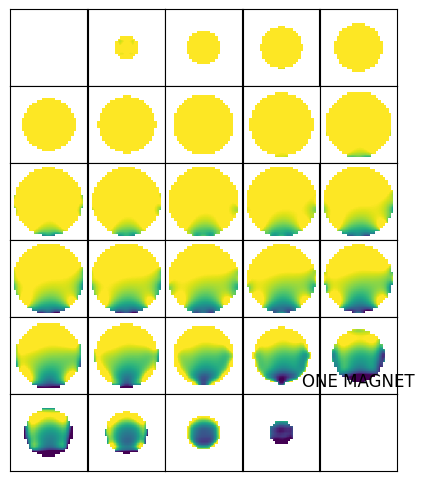

In [15]:
# ONE MAGNET field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_onemagnet.xDim_SPH_fine
oneMagnetField = b0map_onemagnet.interpolatedField
print(np.nanmean(oneMagnetField))

print(np.nanmin(oneMagnetField),np.nanmax(oneMagnetField))

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(oneMagnetField[i+j*5,:,:],clim=[-0.3,-0.12])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('ONE MAGNET')

plt.savefig('./pics/ONEMAGNET_FIELD.png',format="png")
plt.savefig('./pics/ONEMAGNET_FIELD.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:

#??? lets generate a shim field of one insert.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2)

In [16]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[-58.5 -40.5   4.5 121.5]


In [17]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))


pos = [shimRadius,-shimRadius/5,0]
positions = []
positions.append(pos)
print(len(positions))


let us position some magnets on a circumference of a R=276 mm YZ circle with X=0
1


magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  30
computing field of one shim magnet at  0.276 -0.055200000000000006 0
235.92247273188096


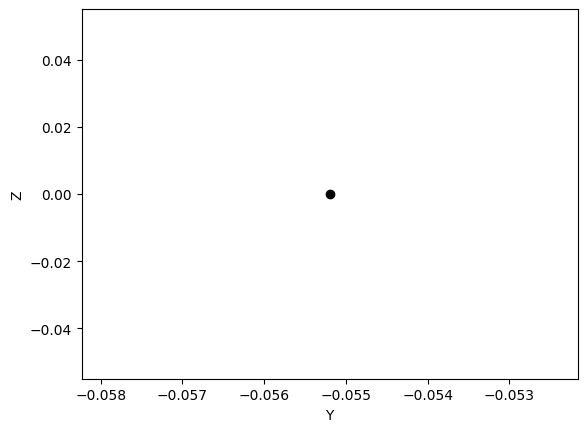

In [18]:

import matplotlib.pyplot as plt
for idx,position in enumerate(positions):

    plt.scatter(position[1],position[2],color = [idx/len(positions),0,0])

plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_onemagnet.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_onemagnet.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_onemagnet.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3

print(DSV)


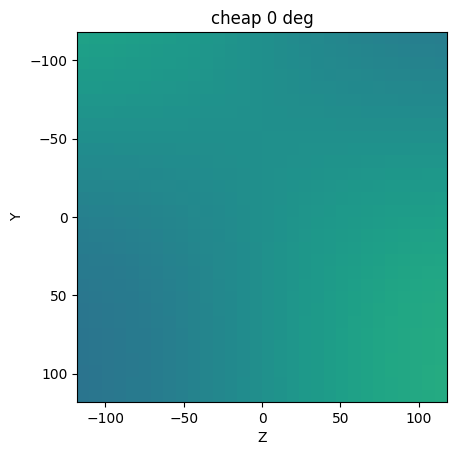

[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]


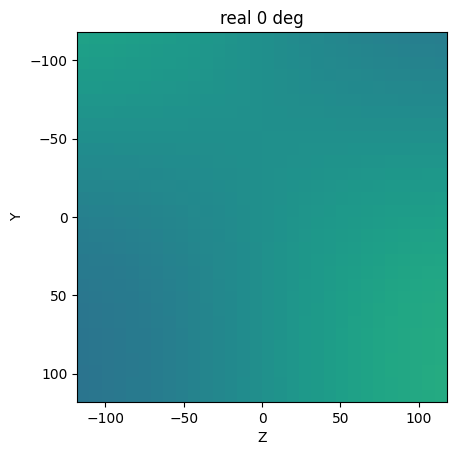

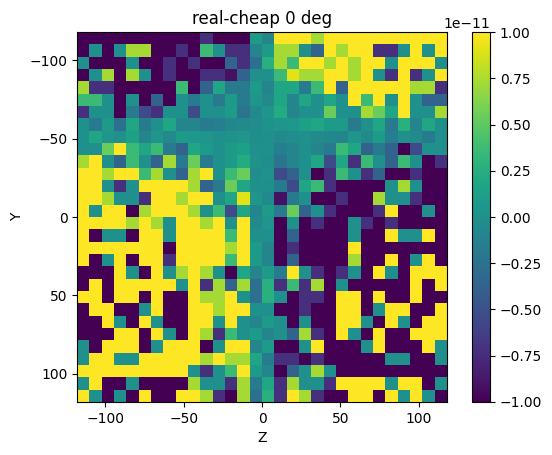

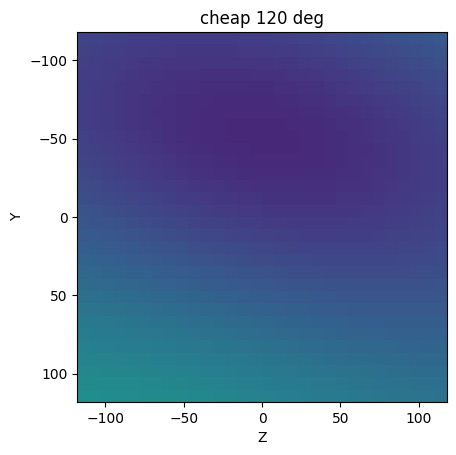

[ 0.00000000e+00 -1.16023953e-08  2.00959382e-08]
1.35
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00 -1.16023953e-08  2.00959382e-08]


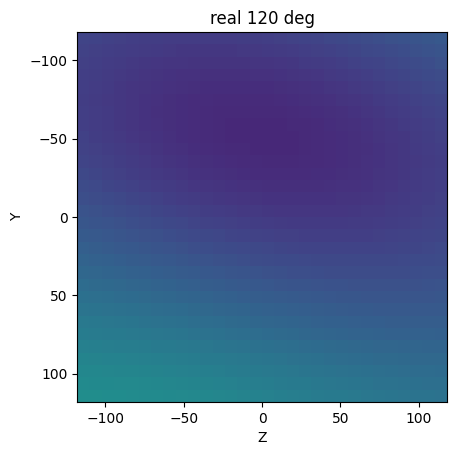

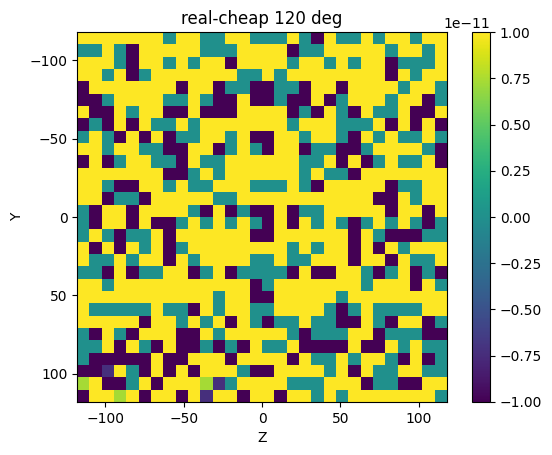

In [19]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_onemagnet.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/3
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()
    
    # DIFF
    plt.imshow(1e3*(magnet.B0[12,:,:,2])-cheapfield,vmin=-1e-11, vmax=1e-11,extent=[-v,v,v,-v])
    plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

[0.00000000e+00 2.84176727e-25 4.64095814e-09]
0.27
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.84176727e-25 4.64095814e-09]


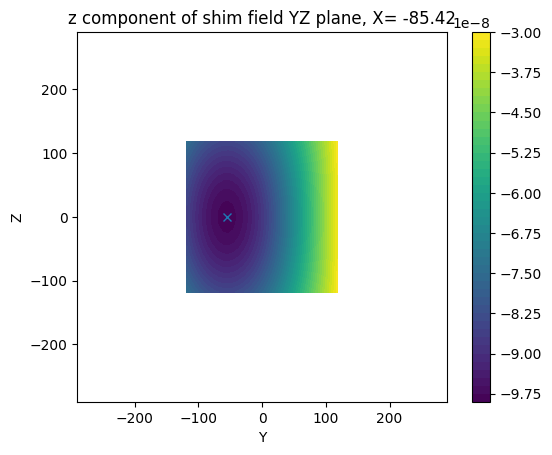

In [21]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_onemagnet.xDim_SPH_fine*1e0
Y = b0map_onemagnet.yDim_SPH_fine*1e0
Z = b0map_onemagnet.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(1):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='xy') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = np.pi/2

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 4
mpbl = ax.contourf(y2d,z2d,np.transpose(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_one_magnet.png',format="png")
plt.savefig('./pics/field_of_one_magnet.pdf',format="pdf")

plt.show()

In [22]:
OneInsertField = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha =np.pi/2#!TEMP-np.pi/2
    magnet.bRem = 1.35 # T
    if idx<4:
        magnet.bRem =-500
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    OneInsertField += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)


oneInsertShimField = initialField+OneInsertField*1.0e3


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_oneInsert = (np.nanmax(oneInsertShimField)-np.nanmin(oneInsertShimField))/np.nanmean(oneInsertShimField)*1e6
print('homo with one insert ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_oneInsert)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(oneInsertShimField))))


print('init min: ',np.nanmin(initialField))
print('affected min: ',np.nanmin(oneInsertShimField))


[0.00000000e+00 2.84176727e-25 4.64095814e-09]
-500
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.84176727e-25 4.64095814e-09]
homo with one insert ppm 5561994 -> 5552616
mean mT 0.60 -> 0.60
init min:  -0.6044304446242412
affected min:  -0.6044389305372269


30


<Figure size 640x480 with 0 Axes>

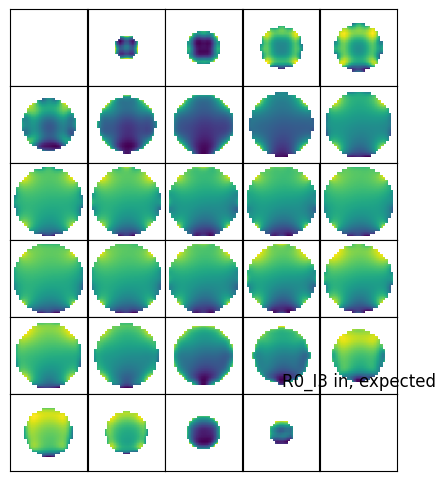

In [24]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_onemagnet.xDim_SPH_fine

shimoffset = np.nanmean(oneInsertShimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(oneInsertShimField[i+j*5,:,:])#,clim=[np.nanmin(initialField)/1.0016+shimoffset,np.nanmax(initialField)/0.9966+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('R0_I3 in, expected')

plt.savefig('./pics/one_magnet_field_expected.png',format="png")
plt.savefig('./pics/one_magnet_field_expected.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
CHECK EULER ROTATIONS!!!!!!!!!
EULER ROTATIONS ARE WRONG!!!!!!!!!
THEY ARE FINE IN THE VIEWER BUT BAD IN THE NOTEBOOK #!!!!!!